# Bandit algorithm Part 2

## First of all, execute below

In [7]:
# Search and utilize, in slot machines
import numpy as np
import random
import matplotlib.pyplot as plt

average_reward_per_number_of_times=[]
cumulative_reward_per_number_of_times=[]
number_of_arm_pulls_in_one_simulation=250
number_of_simulations=3000
random_number_generator = np.random.RandomState(3)
#random_number_generator = np.random

class MyArmClass():
    def __init__(self,probability):
        self.probability=probability
        self.number_of_arm_pulls=0
        self.average_reward=0
    def arm_initialization(self):
        self.number_of_arm_pulls=0
        self.average_reward=0        
    def update_average_reward(self,this_reward):
        n=self.number_of_arm_pulls
        self.average_reward=((n-1)*self.average_reward+this_reward)/n        
    def pull(self):
        random_number_0_to_1 = random_number_generator.uniform(0, 1)
        if random_number_0_to_1 <= self.probability:
            this_reward=1
        else:
            this_reward=0
        self.number_of_arm_pulls=self.number_of_arm_pulls+1
        self.update_average_reward(this_reward)
        return this_reward

arm1=MyArmClass(0.1)
arm2=MyArmClass(0.1)
arm3=MyArmClass(0.1)
arm4=MyArmClass(0.1)
arm5=MyArmClass(0.9)
array_of_arm=[arm1,arm2,arm3,arm4,arm5]

def know_the_index_of_the_arm_with_the_highest_average_reward(array_of_arm):
    temp_max_value = -1
    temp_max_index_array=[]
    for this_arm_index in range(len(array_of_arm)):
        if array_of_arm[this_arm_index].average_reward > temp_max_value:
            temp_max_value=array_of_arm[this_arm_index].average_reward
            temp_max_index_array=[this_arm_index]
        elif array_of_arm[this_arm_index].average_reward == temp_max_value:
            temp_max_index_array.append(this_arm_index)
    return random_number_generator.choice(temp_max_index_array)

def decide_arm_by_ε_greedy_method(selectivity_of_random_action_ε,array_of_arm):
    random_number_0_to_1 = random_number_generator.uniform(0, 1)
    # If the random number is greater than or equal to ε, select the arm with the largest average reward    
    if selectivity_of_random_action_ε <= random_number_0_to_1:
        index_with_the_highest_average_reward=know_the_index_of_the_arm_with_the_highest_average_reward(array_of_arm)
        #print("Utilize ",end="")
        return index_with_the_highest_average_reward
    # If the random number is less than ε, a random arm
    else:
        #print("Search ",end="")
        return random_number_generator.randint(len(array_of_arm))

def Simulation_by_ε_greedy_method(array_of_arm,number_of_arm_pulls_in_one_simulation,number_of_simulations,selectivity_of_random_action_ε):
    global average_reward_per_number_of_times #  global variable
    global cumulative_reward_per_number_of_times #  global variable
    average_reward_per_number_of_times=[]
    cumulative_reward_per_number_of_times=[]
    
    for number_of_times in range(number_of_arm_pulls_in_one_simulation):
        average_reward_per_number_of_times.append([]) # Empty
        cumulative_reward_per_number_of_times.append([]) # Empty        

    for this_simulation in range(number_of_simulations):
        total_reward_for_this_simulation=0
        for this_arm in array_of_arm:        
            this_arm.arm_initialization()

        #print("==========================================")
        #print("Search or use, number of times, index of arm pulled,")
        #print("    reward obtained, number of times this arm was pulled, average reward of this arm,")
        #print("        average reward in this simulation")
        
        for this_time in range(number_of_arm_pulls_in_one_simulation):            
            index_of_the_decided_arm=decide_arm_by_ε_greedy_method(selectivity_of_random_action_ε,array_of_arm)
            this_arm=array_of_arm[index_of_the_decided_arm]
            earned_reward=this_arm.pull()
            total_reward_for_this_simulation=total_reward_for_this_simulation+earned_reward
            average_reward_for_this_simulation=total_reward_for_this_simulation/(this_time+1)        
            #print(this_time,"",end="")
            #print(index_of_the_decided_arm,end="")            
            #print("",earned_reward,this_arm.number_of_arm_pulls,this_arm.average_reward,end="")
            #print("",average_reward_for_this_simulation)            
            average_reward_per_number_of_times[this_time].append(average_reward_for_this_simulation)
            cumulative_reward_per_number_of_times[this_time].append(total_reward_for_this_simulation)
        #print("Search or use, number of times, index of arm pulled,")
        #print("    reward obtained, number of times this arm was pulled, average reward of this arm,")
        #print("        average reward in this simulation")



## Set ε = 0.5 and  simulate 3000 times　for “250 arm selections”
## Output the average reward per number as text  
   Note : Wait a while

In [8]:
def display_average_reward_for_each_time_as_text(number_of_arm_pulls_in_one_simulation):
    for number_of_times in range(number_of_arm_pulls_in_one_simulation):
        print(number_of_times,np.mean(average_reward_per_number_of_times[number_of_times]))

number_of_arm_pulls_in_one_simulation=250
number_of_simulations=3000        
Simulation_by_ε_greedy_method(array_of_arm,number_of_arm_pulls_in_one_simulation,number_of_simulations,0.5)
display_average_reward_for_each_time_as_text(number_of_arm_pulls_in_one_simulation)

0 0.2643333333333333
1 0.28783333333333333
2 0.31055555555555553
3 0.3288333333333333
4 0.34293333333333337
5 0.3572222222222223
6 0.36904761904761896
7 0.37916666666666665
8 0.38914814814814813
9 0.3973999999999999
10 0.4064545454545454
11 0.4149722222222222
12 0.42143589743589743
13 0.4265238095238096
14 0.4324
15 0.43804166666666666
16 0.4435490196078431
17 0.44790740740740737
18 0.45231578947368417
19 0.45670000000000005
20 0.46047619047619043
21 0.4652121212121212
22 0.4687826086956522
23 0.47198611111111116
24 0.47516
25 0.47806410256410253
26 0.48060493827160494
27 0.48375
28 0.48626436781609195
29 0.4883222222222222
30 0.49115053763440863
31 0.4938020833333333
32 0.4959494949494949
33 0.49851960784313726
34 0.5003333333333333
35 0.5025925925925926
36 0.5041531531531531
37 0.5063070175438595
38 0.5082905982905983
39 0.5104083333333334
40 0.5117804878048781
41 0.5133888888888888
42 0.5145426356589148
43 0.5159924242424242
44 0.5173481481481481
45 0.5187971014492754
46 0.519709219

## Set ε = 0.5 and  simulate 3000 times　for “250 arm selections”
## Display the average reward for each times
   Note : Wait a while

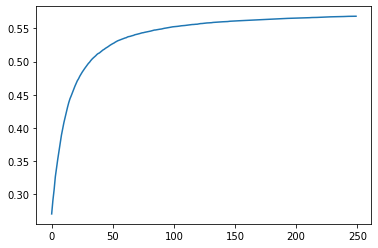

In [9]:
def plot_average_reward_per_times(label,number_of_arm_pulls_in_one_simulation):
    y_for_plot=[]
    for number_of_times in range(number_of_arm_pulls_in_one_simulation):
        y_for_plot.append(np.mean(average_reward_per_number_of_times[number_of_times]))
    plt.plot(y_for_plot,label=label)
    
Simulation_by_ε_greedy_method(array_of_arm,number_of_arm_pulls_in_one_simulation,number_of_simulations,0.5)
plot_average_reward_per_times(0.5,number_of_arm_pulls_in_one_simulation)
plt.show()

## Change ε to 0.1, 0.3, 0.5

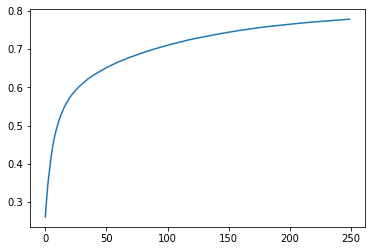

In [10]:
# ε=0.1
Simulation_by_ε_greedy_method(array_of_arm,number_of_arm_pulls_in_one_simulation,number_of_simulations,0.1)
plot_average_reward_per_times(0.1,number_of_arm_pulls_in_one_simulation)
plt.show()
# Wait a while

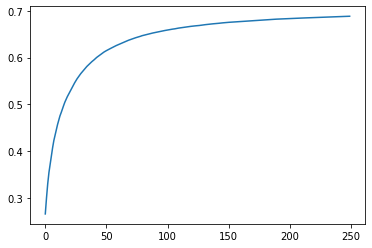

In [11]:
# ε=0.3
Simulation_by_ε_greedy_method(array_of_arm,number_of_arm_pulls_in_one_simulation,number_of_simulations,0.3)
plot_average_reward_per_times(0.3,number_of_arm_pulls_in_one_simulation)
plt.show()
# Wait a while

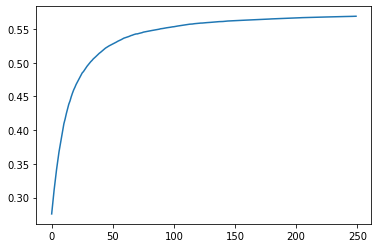

In [12]:
# ε=0.5
Simulation_by_ε_greedy_method(array_of_arm,number_of_arm_pulls_in_one_simulation,number_of_simulations,0.5)
plot_average_reward_per_times(0.5,number_of_arm_pulls_in_one_simulation)
plt.show()
# Wait a while

## Overlay and plot the three results and add legend

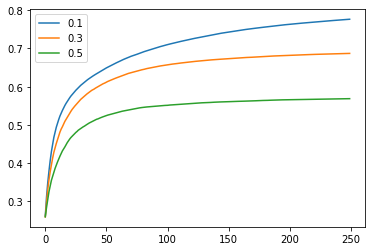

In [13]:
# ε=0.1
Simulation_by_ε_greedy_method(array_of_arm,number_of_arm_pulls_in_one_simulation,number_of_simulations,0.1)
plot_average_reward_per_times(0.1,number_of_arm_pulls_in_one_simulation)
# ε=0.3
Simulation_by_ε_greedy_method(array_of_arm,number_of_arm_pulls_in_one_simulation,number_of_simulations,0.3)
plot_average_reward_per_times(0.3,number_of_arm_pulls_in_one_simulation)
# ε=0.5
Simulation_by_ε_greedy_method(array_of_arm,number_of_arm_pulls_in_one_simulation,number_of_simulations,0.5)
plot_average_reward_per_times(0.5,number_of_arm_pulls_in_one_simulation)

plt.legend(loc='best')
plt.show()
# Wait a while


## Change ε to 0.1, 0.3, 0.5
## Display the cumulative reward for each times
   Note : Wait a while

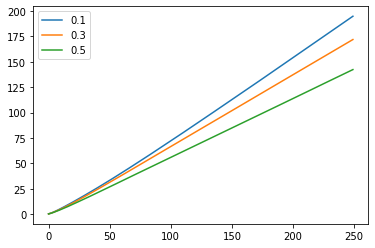

In [15]:
def plot_cumulative_reward_for_each_times(label,number_of_arm_pulls_in_one_simulation):
    y_for_plot=[]
    for number_of_times in range(number_of_arm_pulls_in_one_simulation):
        y_for_plot.append(np.mean(cumulative_reward_per_number_of_times[number_of_times]))
    plt.plot(y_for_plot,label=label)

Simulation_by_ε_greedy_method(array_of_arm,number_of_arm_pulls_in_one_simulation,number_of_simulations,0.1)
plot_cumulative_reward_for_each_times(0.1,number_of_arm_pulls_in_one_simulation)

Simulation_by_ε_greedy_method(array_of_arm,number_of_arm_pulls_in_one_simulation,number_of_simulations,0.3)
plot_cumulative_reward_for_each_times(0.3,number_of_arm_pulls_in_one_simulation)

Simulation_by_ε_greedy_method(array_of_arm,number_of_arm_pulls_in_one_simulation,number_of_simulations,0.5)
plot_cumulative_reward_for_each_times(0.5,number_of_arm_pulls_in_one_simulation)

plt.legend(loc='best')
plt.show()
# Wait a while


## Set 0 to ε and display the average reward

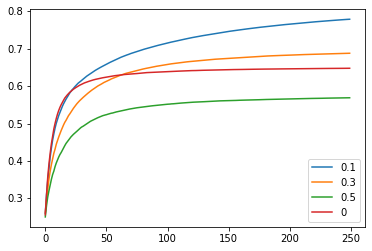

In [16]:
Simulation_by_ε_greedy_method(array_of_arm,number_of_arm_pulls_in_one_simulation,number_of_simulations,0.1)
plot_average_reward_per_times(0.1,number_of_arm_pulls_in_one_simulation)

Simulation_by_ε_greedy_method(array_of_arm,number_of_arm_pulls_in_one_simulation,number_of_simulations,0.3)
plot_average_reward_per_times(0.3,number_of_arm_pulls_in_one_simulation)

Simulation_by_ε_greedy_method(array_of_arm,number_of_arm_pulls_in_one_simulation,number_of_simulations,0.5)
plot_average_reward_per_times(0.5,number_of_arm_pulls_in_one_simulation)

Simulation_by_ε_greedy_method(array_of_arm,number_of_arm_pulls_in_one_simulation,number_of_simulations,0) # ε is 0
plot_average_reward_per_times(0,number_of_arm_pulls_in_one_simulation)

plt.legend(loc='best')
plt.show()
# Wait a while

## Add ε = 1

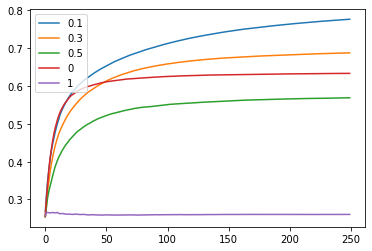

In [17]:
Simulation_by_ε_greedy_method(array_of_arm,number_of_arm_pulls_in_one_simulation,number_of_simulations,0.1)
plot_average_reward_per_times(0.1,number_of_arm_pulls_in_one_simulation)

Simulation_by_ε_greedy_method(array_of_arm,number_of_arm_pulls_in_one_simulation,number_of_simulations,0.3)
plot_average_reward_per_times(0.3,number_of_arm_pulls_in_one_simulation)

Simulation_by_ε_greedy_method(array_of_arm,number_of_arm_pulls_in_one_simulation,number_of_simulations,0.5)
plot_average_reward_per_times(0.5,number_of_arm_pulls_in_one_simulation)

Simulation_by_ε_greedy_method(array_of_arm,number_of_arm_pulls_in_one_simulation,number_of_simulations,0) # ε is 0
plot_average_reward_per_times(0,number_of_arm_pulls_in_one_simulation)

Simulation_by_ε_greedy_method(array_of_arm,number_of_arm_pulls_in_one_simulation,number_of_simulations,1) # ε is 1
plot_average_reward_per_times(1,number_of_arm_pulls_in_one_simulation)

plt.legend(loc='best')
plt.show()
# Wait a while

## Anneal to gradually reduce ε from 0.5
## And display the average reward for each times

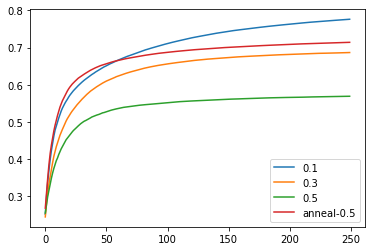

In [20]:
def decide_arm_by_annealing_ε_greedy(selectivity_of_random_action_ε,array_of_arm,number_of_times):
    selectivity_of_random_action_ε = selectivity_of_random_action_ε*(1/(number_of_times+1)) # Decrease ε when the number of pulls increases
    random_number_0_to_1 = random_number_generator.uniform(0, 1)
    # If the random number is greater than or equal to ε, select the arm with the largest average reward 
    if selectivity_of_random_action_ε <= random_number_0_to_1:
        index_with_the_highest_average_reward=know_the_index_of_the_arm_with_the_highest_average_reward(array_of_arm)
        return index_with_the_highest_average_reward
    # If the random number is less than ε, a random arm
    else:
        return random_number_generator.randint(len(array_of_arm))

def simulation_by_annealing_ε_greedy(array_of_arm,number_of_arm_pulls_in_one_simulation,number_of_simulations,selectivity_of_random_action_ε):
    global average_reward_per_number_of_times #  global variable    
    average_reward_per_number_of_times=[]
    
    for number_of_times in range(number_of_arm_pulls_in_one_simulation):
        average_reward_per_number_of_times.append([]) # Empty

    for this_simulation in range(number_of_simulations):
        total_reward_for_this_simulation=0
        for this_arm in array_of_arm:        
            this_arm.arm_initialization()
                    
        for this_time in range(number_of_arm_pulls_in_one_simulation):
            index_of_the_decided_arm=decide_arm_by_annealing_ε_greedy(selectivity_of_random_action_ε,array_of_arm,this_time)
            this_arm=array_of_arm[index_of_the_decided_arm]
            earned_reward=this_arm.pull()
            total_reward_for_this_simulation=total_reward_for_this_simulation+earned_reward
            average_reward_for_this_simulation=total_reward_for_this_simulation/(this_time+1)
            average_reward_per_number_of_times[this_time].append(average_reward_for_this_simulation)

Simulation_by_ε_greedy_method(array_of_arm,number_of_arm_pulls_in_one_simulation,number_of_simulations,0.1)
plot_average_reward_per_times(0.1,number_of_arm_pulls_in_one_simulation)

Simulation_by_ε_greedy_method(array_of_arm,number_of_arm_pulls_in_one_simulation,number_of_simulations,0.3)
plot_average_reward_per_times(0.3,number_of_arm_pulls_in_one_simulation)

Simulation_by_ε_greedy_method(array_of_arm,number_of_arm_pulls_in_one_simulation,number_of_simulations,0.5)
plot_average_reward_per_times(0.5,number_of_arm_pulls_in_one_simulation)

simulation_by_annealing_ε_greedy(array_of_arm,number_of_arm_pulls_in_one_simulation,number_of_simulations,0.5)
plot_average_reward_per_times("anneal-0.5",number_of_arm_pulls_in_one_simulation)
plt.legend(loc='best')
plt.show()
# Wait a while